In [262]:
import datetime
import numpy as np
import pandas as pd
from pandas_datareader import data 

from hmmlearn.hmm import GaussianHMM

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.dates import YearLocator, MonthLocator
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Import Stocks from yahoo Finance and process data

In [263]:
ticker = "TSLA"

start_date = datetime.date(2010, 6, 29)
end_date = datetime.date(2021, 11, 30)
Stocks = data.DataReader(ticker, 'yahoo', start_date, end_date)

Stocks.to_csv('TSLA_2.0.csv')


In [264]:
Stocks.tail(30)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-19,877.950012,862.510010,877.530029,864.270020,17381100.0,864.270020
2021-10-20,869.489990,857.380005,865.349976,865.799988,14032100.0,865.799988
2021-10-21,900.000000,855.500000,856.000000,894.000000,31481500.0,894.000000
2021-10-22,910.000000,890.960022,895.500000,909.679993,22880800.0,909.679993
2021-10-25,1045.020020,944.200012,950.530029,1024.859985,62852100.0,1024.859985
2021-10-26,1094.939941,1001.440002,1024.689941,1018.429993,62415000.0,1018.429993
2021-10-27,1070.880005,1030.780029,1039.660034,1037.859985,38526500.0,1037.859985
2021-10-28,1081.000000,1054.199951,1068.310059,1077.040039,27213200.0,1077.040039
2021-10-29,1115.209961,1073.209961,1081.859985,1114.000000,29918400.0,1114.000000


In [265]:
Stocks.shape

(2877, 6)

In [266]:
Stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2877 entries, 2010-06-29 to 2021-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2877 non-null   float64
 1   Low        2877 non-null   float64
 2   Open       2877 non-null   float64
 3   Close      2877 non-null   float64
 4   Volume     2877 non-null   float64
 5   Adj Close  2877 non-null   float64
dtypes: float64(6)
memory usage: 157.3 KB


In [267]:
Stocks.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2877.000000,2877.000000,2877.000000,2877.000000,2.877000e+03,2877.000000
mean,118.855613,113.823228,116.371600,116.512396,3.145350e+07,116.512396
std,217.543828,208.134766,212.827362,213.263542,2.832689e+07,213.263542
min,3.326000,2.996000,3.228000,3.160000,5.925000e+05,3.160000
25%,12.474000,11.142000,12.400000,11.900000,1.269600e+07,11.900000
50%,46.894001,45.299999,46.015999,46.051998,2.502050e+07,46.051998
75%,67.348000,65.008003,66.024002,66.255997,4.010350e+07,66.255997
max,1243.489990,1217.000000,1234.410034,1229.910034,3.046940e+08,1229.910034


In [268]:
Stocks.reset_index(inplace=True,drop=False)
Stocks.drop(['Low','Open','High','Adj Close','Volume'],axis=1,inplace=True)
Stocks['Date'] = Stocks['Date'].apply(datetime.datetime.toordinal)
Stocks = list(Stocks.itertuples(index=False, name=None))


In [269]:
dates = np.array([q[0] for q in Stocks], dtype=int)
end_val = np.array([q[1] for q in Stocks])

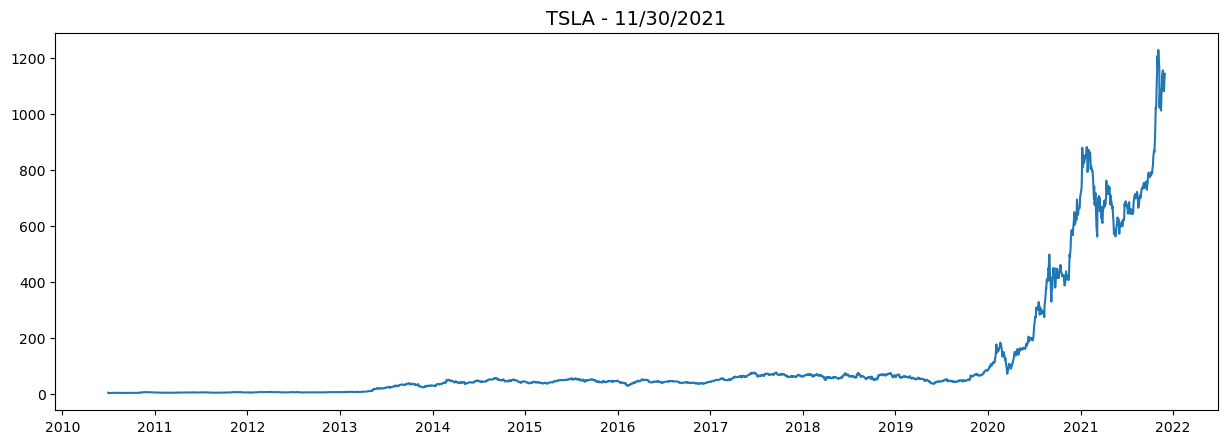

In [270]:
diff = np.diff(end_val)
dates = dates[1:]
end_val = end_val[1:]
X = np.column_stack([diff])
plt.figure(figsize=(15, 5), dpi=100) 
plt.title(ticker + " - " + end_date.strftime("%m/%d/%Y"), fontsize = 14)
plt.gca().xaxis.set_major_locator(YearLocator())
plt.plot_date(dates,end_val,"-")
plt.show()


## Deploy HMMLearn Model and Visualization

In [271]:
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000)
model.fit(X)

GaussianHMM(n_components=4, n_iter=1000)

In [272]:
hidden_states = model.predict(X)


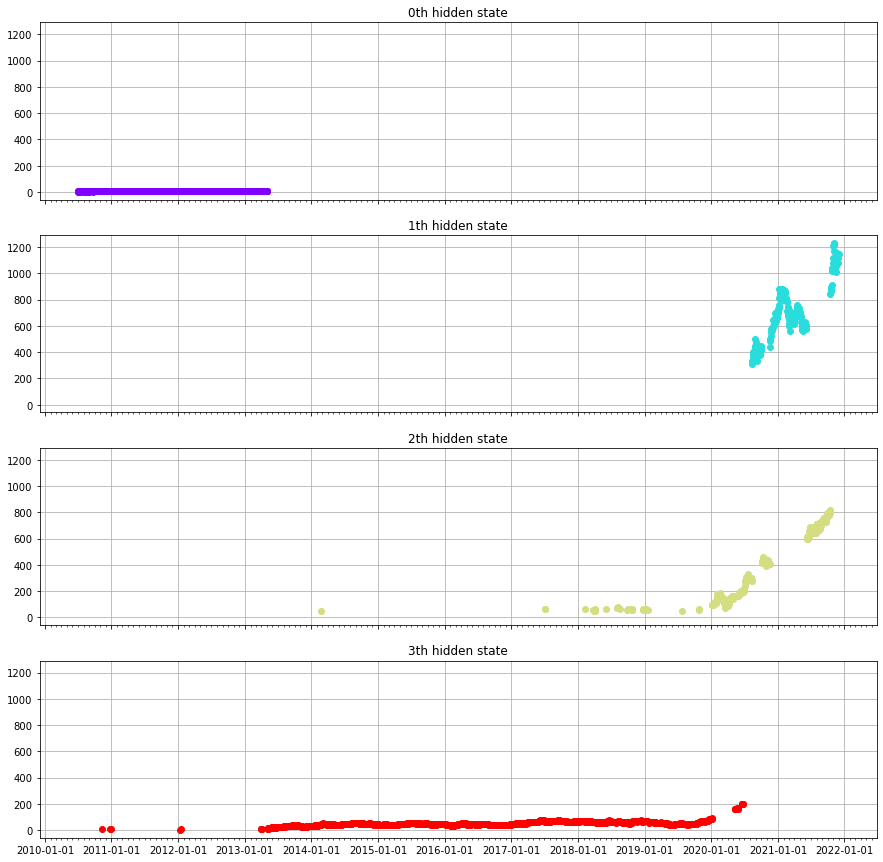

In [273]:
fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(15,15))
colours = cm.rainbow(np.linspace(0, 1, model.n_components))

for i, (ax, colour) in enumerate(zip(axs, colours)):
    
    mask = hidden_states == i
   
    ax.plot_date(dates[mask], end_val[mask], c=colour)
    ax.set_title("{0}th hidden state".format(i))

    
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)
plt.show()


In [274]:
expected_returns_ = np.dot(model.transmat_, model.means_)
returns_columnwise = list(zip(*expected_returns_))
expected_returns = returns_columnwise[0]

## Make Prediction...

In [275]:
lastN = 30
start_date = datetime.date.today() - datetime.timedelta(days=lastN*2) 
dates = np.array([q[0] for q in Stocks], dtype=int)

In [276]:
predicted_prices = []
predicted_dates = []

for idx in range(lastN):
    state = hidden_states[-lastN+idx]
    current_price = Stocks[-lastN+idx][1]
    current_date = datetime.date.fromordinal(dates[-lastN+idx-1])
    predicted_date = current_date + datetime.timedelta(days=1)
    predicted_dates.append(predicted_date)
    predicted_prices.append(current_price + expected_returns[state])  



In [277]:
print('Actual:',end_val[-lastN:], '\n','Prediction:', predicted_prices )

Actual: [ 864.27001953  865.79998779  894.          909.67999268 1024.85998535
 1018.42999268 1037.85998535 1077.04003906 1114.         1208.58996582
 1172.         1213.85998535 1229.91003418 1222.08996582 1162.93994141
 1023.5        1067.94995117 1063.51000977 1033.42004395 1013.39001465
 1054.72998047 1089.01000977 1096.38000488 1137.06005859 1156.86999512
 1109.0300293  1116.         1081.92004395 1136.98999023 1144.76000977] 
 Prediction: [867.2918098244627, 868.8217780861814, 897.0217902932127, 912.7017829689939, 1027.8817756447752, 1021.4517829689939, 1040.8817756447752, 1080.0618293557127, 1117.0217902932127, 1211.6117561135252, 1175.0217902932127, 1216.8817756447752, 1232.9318244729002, 1225.1117561135252, 1165.9617316994627, 1026.5217902932127, 1070.9717414650877, 1066.5318000588377, 1036.4418342385252, 1016.4118049416502, 1057.7517707619627, 1092.0318000588377, 1099.4017951760252, 1140.0818488869627, 1159.8917854104002, 1112.0518195900877, 1119.0217902932127, 1084.941834238

## SVR

In [278]:

from sklearn.svm import SVR

df = pd.read_csv('TSLA_2.0.csv')
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000000,3.508000,3.800000,4.778000,93831500.0,4.778000
1,2010-06-30,6.084000,4.660000,5.158000,4.766000,85935500.0,4.766000
2,2010-07-01,5.184000,4.054000,5.000000,4.392000,41094000.0,4.392000
3,2010-07-02,4.620000,3.742000,4.600000,3.840000,25699000.0,3.840000
4,2010-07-06,4.000000,3.166000,4.000000,3.222000,34334500.0,3.222000
...,...,...,...,...,...,...,...
2872,2021-11-23,1180.500000,1062.699951,1167.510010,1109.030029,36171700.0,1109.030029
2873,2021-11-24,1132.770020,1062.000000,1080.390015,1116.000000,22560200.0,1116.000000
2874,2021-11-26,1108.780029,1081.000000,1099.469971,1081.920044,11680900.0,1081.920044
2875,2021-11-29,1142.670044,1100.189941,1100.989990,1136.989990,19464500.0,1136.989990


In [279]:
df = df.tail(30)
df

,Date,High,Low,Open,Close,Volume,Adj Close
2847,2021-10-19,877.950012,862.510010,877.530029,864.270020,17381100.0,864.270020
2848,2021-10-20,869.489990,857.380005,865.349976,865.799988,14032100.0,865.799988
2849,2021-10-21,900.000000,855.500000,856.000000,894.000000,31481500.0,894.000000
2850,2021-10-22,910.000000,890.960022,895.500000,909.679993,22880800.0,909.679993
2851,2021-10-25,1045.020020,944.200012,950.530029,1024.859985,62852100.0,1024.859985
2852,2021-10-26,1094.939941,1001.440002,1024.689941,1018.429993,62415000.0,1018.429993
2853,2021-10-27,1070.880005,1030.780029,1039.660034,1037.859985,38526500.0,1037.859985
2854,2021-10-28,1081.000000,1054.199951,1068.310059,1077.040039,27213200.0,1077.040039
2855,2021-10-29,1115.209961,1073.209961,1081.859985,1114.000000,29918400.0,1114.000000
2856,2021-11-01,1209.750000,1118.660034,1145.000000,1208.589966,56048700.0,1208.589966


In [280]:
df_days = df.loc[:,'Date']
df['Date'] = df['Date'].astype('datetime64[ns]')
df['Date'] = df['Date'].apply(datetime.datetime.toordinal)


In [281]:
days = list()
Close_prices = list()
df_day = df.loc[:,'Date']
df_Close = df.loc[:,'Close']

for day in df_day:
   days.append( [int(day)] )
for close_price in df_Close:
   Close_prices.append(float(close_price))

print(len(df_days))
print(Close_prices)

30
[864.27001953125, 865.7999877929688, 894.0, 909.6799926757812, 1024.8599853515623, 1018.4299926757812, 1037.8599853515623, 1077.0400390625, 1114.0, 1208.5899658203125, 1172.0, 1213.8599853515625, 1229.9100341796875, 1222.0899658203125, 1162.93994140625, 1023.5, 1067.949951171875, 1063.510009765625, 1033.4200439453123, 1013.3900146484376, 1054.72998046875, 1089.010009765625, 1096.3800048828123, 1137.06005859375, 1156.8699951171875, 1109.030029296875, 1116.0, 1081.9200439453123, 1136.989990234375, 1144.760009765625]


In [282]:
def createList(r1, r2):
    if (r1 == r2):
        return r1
    else:
        res = []
    # loop to append successors to
    # list until r2 is reached.
        while(r1 < r2+1 ):
            res.append(r1)
            r1 += 1
        return res
    # Driver Code

r1, r2 = 1, len(df_days)
print(createList(r1, r2))
df_d=createList(r1, r2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [283]:
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, Close_prices)
svr_predict=rbf_svr.predict(days)

## RESULTS

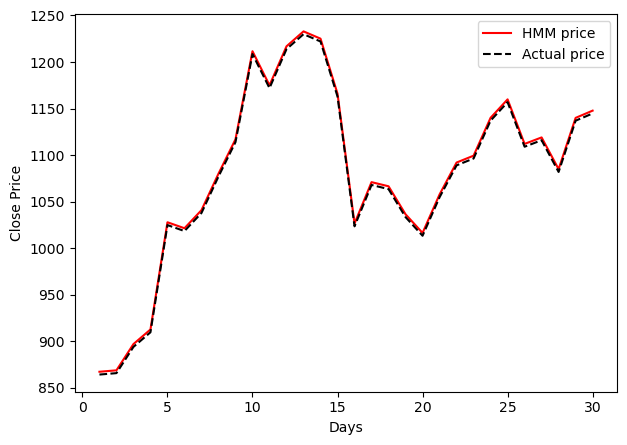

In [284]:
plt.figure(figsize=(7, 5), dpi=100) 

plt.plot(df_d,predicted_prices ,color = 'red',label='HMM price')
plt.plot(df_d,Close_prices ,color = 'black',label='Actual price',linestyle='dashed')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.show()

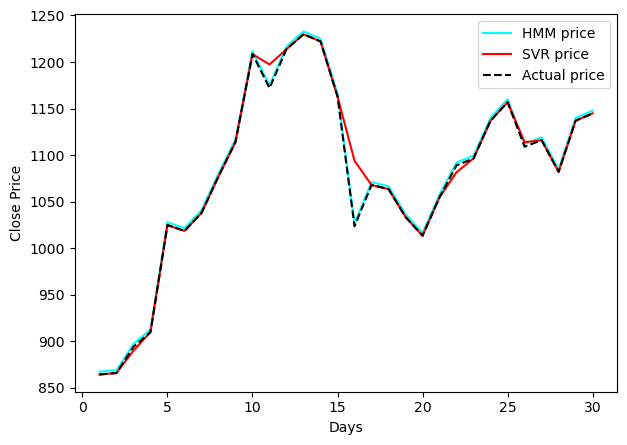

In [285]:
plt.figure(figsize=(7, 5), dpi=100) 

plt.plot(df_d,predicted_prices ,color = 'cyan',label='HMM price')
plt.plot(df_d,svr_predict,color = 'red',label='SVR price')
plt.plot(df_d,Close_prices ,color = 'black',label='Actual price',linestyle='dashed')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.show()

In [286]:
X = np.array(Close_prices)
y = np.array(predicted_prices)
z = np.array(svr_predict)

In [287]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

LR_MAPE1= MAPE(X,y)
LR_MAPE2= MAPE(X,z)
print("MAPE for HMM model: ",LR_MAPE1)
print("MAPE for SVR model: ",LR_MAPE2)

MAPE for HMM model:  0.2828241492490711
MAPE for SVR model:  0.3620991138826727
